
В цьому завданні ти реалізуєш різні методи вирішення систем лінійних рівнянь та порівняєш їх швидкість. Написані функції мають працювати з системами будь-якого розміру.
- Задай матрицю та вектор вільних членів для наступної системи:

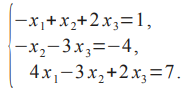


In [ ]:
import numpy as np
#Matrix A
A = np.array([
    [-1, 1, 2],
    [0, -1, -3],
    [4, -3, 2]
])
# Vector B
B = np.array([
    [1],
    [-4],
    [7]
])

print(A)
print(B)

[[-1  1  2]
 [ 0 -1 -3]
 [ 4 -3  2]]
[[ 1]
 [-4]
 [ 7]]



- Напиши функцію для вирішення системи матричним методом
- Напиши функцію для вирішення системи методом Крамера
- Напиши функцію для вирішення системи методом Гауса
- Прочитай систему з csv файлу за [посиланням](https://docs.google.com/spreadsheets/d/1WdYrT6ukWxm0h-5DiMF3LZPIV7kBZiLYJgfPhWY0DNM/edit#gid=0) та виріши її трьома реалізованими функціями. Зроби висновки щодо теоретичних очікувань та фактичного отриманого часу виконання. Обґрунтуй отримані результати.

In [ ]:
# Напиши функцію для вирішення системи матричним методом

def solve_inv_matrix(A, B, verbose=False):
    det_A = np.linalg.det(A)

    if det_A != 0:
      A_inv = np.linalg.inv(A)
      x = np.dot(A_inv, B)
      return x
    else:
      print('Determinant is zero, there is no unique solutions')

print(f"Вектор рішення: \r\n {solve_inv_matrix(A, B)}")

Вектор рішення: 
 [[2.]
 [1.]
 [1.]]


In [ ]:
# Напиши функцію для вирішення системи методом Крамера

def solve_cramer(A, B, verbose=False):
    mA, mB = np.copy(A), np.copy(B)
    n = len(mB)

    # визначаємо детермінат матриці А
    det_A = np.linalg.det(mA)
    if det_A == 0:
        return None  # Система не має розв'язку

    # створюємо нульовий вектор для відповіді
    x = np.zeros((n, 1))

    #за допомогою циклу замінюємо ствбчики матриці А на вектор Б та вираховуємо значення х
    for i in range(n):
        Ai = mA.copy()
        Ai[:, i] = mB[:, 0]
        det_A_i = np.linalg.det(Ai)
        x[i, 0] = det_A_i / det_A
    return x

print(f"Вектор рішення: \r\n {solve_cramer(A, B)}")

Вектор рішення: 
 [[2.]
 [1.]
 [1.]]


In [ ]:
# Напиши функцію для вирішення системи методом Гауса
def solve_gausse(A, B, verbose=False):
    mA, mB = np.copy(A).astype(np.float64), np.copy(B).astype(np.float64)

    #визначаємо довжину вектора Б
    n = len(mB)

    # знаходимо опорний елемент
    for i in range(n):
        pivot_row = i

        for j in range(i+1, n):
            if abs(mA[j, i]) > abs(mA[pivot_row, i]):
                pivot_row = j

        # Переставляємо строки, щоб головний елемент опинився на головній діагоналі
        mA[[i, pivot_row]] = mA[[pivot_row, i]]
        mB[[i, pivot_row]] = mB[[pivot_row, i]]
        print('pivot_row', pivot_row)
        print(np.array(mA))
        print(np.array(mB))

        # Застосування еквівалентних перетворень
        for j in range(i+1, n):
            factor = mA[j, i] / mA[i, i]
            mB[j] -= factor * mB[i]
            mA[j, i:] -= factor * mA[i, i:]

    # створюємо нульовий х для 'складування' відповіді
    x = np.zeros((n, 1))
    for i in range(n-1, -1, -1):
        x[i] = (mB[i] - np.dot(mA[i, i+1:], x[i+1:])) / mA[i, i]
    return x

print(f"Вектор рішення: \r\n {solve_gausse(A, B)}")

pivot_row 2
[[ 4. -3.  2.]
 [ 0. -1. -3.]
 [-1.  1.  2.]]
[[ 7.]
 [-4.]
 [ 1.]]
pivot_row 1
[[ 4.   -3.    2.  ]
 [ 0.   -1.   -3.  ]
 [ 0.    0.25  2.5 ]]
[[ 7.  ]
 [-4.  ]
 [ 2.75]]
pivot_row 2
[[ 4.   -3.    2.  ]
 [ 0.   -1.   -3.  ]
 [ 0.    0.    1.75]]
[[ 7.  ]
 [-4.  ]
 [ 1.75]]
Вектор рішення: 
 [[2.]
 [1.]
 [1.]]


In [ ]:
# Прочитай систему з csv файлу за посиланням та виріши її трьома реалізованими функціями.
# Опиши теоретичні очікування та фактичну різницю часу виконання. Яка, на твою думку, причина результатів, які ми бачимо?
import pandas as pd

url = 'https://docs.google.com/spreadsheets/u/0/d/1WdYrT6ukWxm0h-5DiMF3LZPIV7kBZiLYJgfPhWY0DNM/edit?fromCopy=true'
url = url[:url.find('/edit')] + '/export?format=csv'

df = pd.read_csv(url)

#дивимось що там
print(df)

     x0  x1  x2  x3  x4  x5  x6  x7  x8  x9  ...  x291  x292  x293  x294  \
0     2   0   2   0   1   2   1   2   1   1  ...     2     0     1     2   
1     2   1   1   0   0   1   0   2   0   0  ...     1     1     0     0   
2     2   1   0   0   0   2   0   0   1   1  ...     1     2     2     0   
3     0   0   2   2   1   2   1   0   1   0  ...     2     0     0     1   
4     1   2   1   2   1   2   2   1   2   2  ...     2     1     1     0   
..   ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ...   ...   ...   ...   ...   
295   2   2   1   0   0   1   0   0   0   1  ...     2     1     1     2   
296   1   2   0   2   1   0   1   0   1   0  ...     0     1     0     0   
297   2   2   1   1   1   0   2   1   2   0  ...     0     1     2     1   
298   0   0   1   1   0   1   0   2   2   1  ...     0     2     0     0   
299   1   0   2   0   0   1   2   1   1   1  ...     2     1     1     2   

     x295  x296  x297  x298  x299    b  
0       2     0     2     1     1  602  
1    

In [ ]:
a = df.iloc[:, :-1].values
b = df['b'].values

print(f'B vector shape ->{b.shape}')

# робимо вектор з 1D -> 2D
b_2d = b.reshape(-1, 1)
print(f'B_2D vector shape ->{b_2d.shape}')

rows, columns = b_2d.shape
print(f"Number of rows: {rows}")
print(f"Number of columns: {columns}")

B vector shape ->(300,)
B_2D vector shape ->(300, 1)
Number of rows: 300
Number of columns: 1


In [ ]:
%%timeit -r 2 -n 10
solve_inv_matrix(a, b)

#solve_inv_matrix(a, b_2d)

print(f"Вектор рішення: \r\n {solve_inv_matrix(a, b)}")

Вектор рішення: 
 [-2.96758174e-11  4.00000000e+00  3.00000000e+00  4.00000000e+00
  4.00000000e+00  4.00000000e+00 -2.18278728e-11  4.54747351e-12
  3.00000000e+00 -2.81943358e-11  6.82121026e-12  2.41016096e-11
  3.00000000e+00  1.00000000e+00 -3.41060513e-13  3.00000000e+00
  1.71667125e-11 -2.27373675e-12  2.00000000e+00  2.00000000e+00
  3.00000000e+00  4.00000000e+00  3.00000000e+00  1.00000000e+00
  4.00000000e+00  3.00000000e+00  2.00000000e+00  5.45696821e-12
  4.00000000e+00  1.00000000e+00  3.00000000e+00  6.57962573e-12
  2.00000000e+00  2.00000000e+00  1.09139364e-11  3.00000000e+00
  2.00000000e+00  1.00000000e+00  3.00000000e+00 -1.75077730e-11
  4.00000000e+00  3.00000000e+00  1.00000000e+00  4.00000000e+00
  4.00000000e+00  4.00000000e+00  3.00000000e+00  1.00000000e+00
  3.00000000e+00  1.00000000e+00  2.00000000e+00  2.00000000e+00
  4.00000000e+00  4.00000000e+00  2.00000000e+00  2.00000000e+00
 -1.05444542e-11  2.39879228e-11  4.00000000e+00  2.00000000e+00
  2.000

Result:
1. for 1D vector B : 22.7 ms ± 2.1 ms per loop (mean ± std. dev. of 2 runs, 10 loops each) for row-B
2. for 2D vector B : 63.3 ms ± 3.45 ms per loop (mean ± std. dev. of 2 runs, 10 loops each)



In [ ]:
%%timeit -r 2 -n 10
solve_cramer(a, b_2d)

print(f"Вектор рішення: \r\n {solve_cramer(a, b_2d)}")

Выходные данные были обрезаны до нескольких последних строк (5000).
 [ 2.00000000e+00]
 [ 4.00000000e+00]
 [ 2.06657929e-12]
 [ 4.00000000e+00]
 [ 3.00000000e+00]
 [ 3.00000000e+00]
 [ 3.00000000e+00]
 [ 4.00000000e+00]
 [ 3.00000000e+00]
 [ 2.00000000e+00]
 [ 2.00000000e+00]
 [ 1.00000000e+00]
 [ 4.00000000e+00]
 [ 2.00000000e+00]
 [ 4.00000000e+00]
 [ 3.00000000e+00]
 [ 9.88839882e-14]
 [ 4.00000000e+00]
 [ 2.00000000e+00]
 [ 1.00000000e+00]
 [ 2.00000000e+00]
 [ 2.00000000e+00]
 [ 2.00000000e+00]
 [ 5.56469196e-13]
 [ 1.00000000e+00]
 [ 1.00000000e+00]
 [-2.02332362e-12]
 [ 4.00000000e+00]
 [ 4.00000000e+00]
 [ 1.00000000e+00]
 [ 3.00000000e+00]
 [-5.17002741e-14]
 [ 2.00000000e+00]
 [-9.77120053e-13]
 [ 8.51294646e-13]
 [ 3.00000000e+00]
 [-1.97671809e-12]
 [-5.64169162e-12]
 [ 2.00000000e+00]
 [ 2.00000000e+00]
 [ 3.00000000e+00]
 [ 1.00000000e+00]
 [ 3.00000000e+00]
 [ 1.00000000e+00]
 [ 2.00000000e+00]
 [-1.69450089e-12]
 [-2.69153847e-12]
 [ 2.00000000e+00]
 [ 1.00000000e+00]
 

Result:
1. for 2D vector B: 2.43 s ± 166 ms per loop (mean ± std. dev. of 2 runs, 10 loops each)
2. N/A as the code need to be re-writed to accept 1D vector B


In [ ]:
%%timeit -r 2 -n 10
solve_gausse(a, b_2d)
print(f"Вектор рішення: \r\n {solve_gausse(a, b_2d)}")

Выходные данные были обрезаны до нескольких последних строк (5000).
 [ 0.          0.          0.         ... -9.01215039  0.92864681
  -3.86540484]]
[[ 602.        ]
 [ 295.        ]
 [-190.5       ]
 [ 260.5       ]
 [ 343.83333333]
 [ -76.32      ]
 [-107.76744186]
 [   3.89403974]
 [ -65.9703763 ]
 [-119.2866242 ]
 [ -13.34462541]
 [ 193.83339143]
 [ 283.47167872]
 [-244.74782063]
 [ 357.87480687]
 [ 334.9052936 ]
 [ 360.75817957]
 [-125.86894148]
 [ 186.20641561]
 [  22.29855551]
 [ 248.28933804]
 [ 164.48858772]
 [ 260.72337127]
 [ 247.92166379]
 [  46.94910704]
 [ 133.39199875]
 [ 128.15153097]
 [ -33.96881879]
 [ 113.73602797]
 [  -7.37476135]
 [  18.07603059]
 [  97.82487811]
 [   3.8072402 ]
 [ -72.85661143]
 [-199.13975539]
 [ -46.69816608]
 [  75.2244485 ]
 [   1.10613596]
 [ -63.78104127]
 [  99.84288819]
 [-273.67899043]
 [-260.37877019]
 [-119.93590541]
 [  27.37028264]
 [  36.21145476]
 [ 109.02335573]
 [ 260.74510535]
 [  -7.56446915]
 [ 193.91394586]
 [  -8.91898256]


Result:
1. for 2D Vector B: 5.43 s ± 50.3 ms per loop (mean ± std. dev. of 2 runs, 10 loops each)
2. for 1D Vector B: 4.28 s ± 69.2 ms per loop (mean ± std. dev. of 2 runs, 10 loops each)


**Висновки**:
Виходячи з розрахунків здається щонайбільш точний це метод Гауса, бо він рахує найдовше, хоча на остаточну швидкість циклу це не так й впливає, та видає найбільше строк. Метод Гауса теж доволі точний, й найшидший і видає останні 5000 рядків.
Також звісно швидкість може бути повязани з циклами в методі Гауса, їх більше.  Найдовший матричний метод, але здається він більш підходить для простих розрахунків. Відповіді також різні, хоча й зрозуміло що числа дуже близькі до нуля.
Цікавим відкриттям для мене було й те, що якщо вектор B записаний як рядковий, то результат при поверхневому аналізі збігається, і все працює, хоча здавалось правильним буде саме запис його як 2D, тобто як стовбець.

In [ ]:
import numpy as np

# порівняння результатів векторного методу

arr1 = np.array([-2.96758174e-11, 4.00000000e+00, 3.00000000e+00, 4.00000000e+00,
                 4.00000000e+00, 4.00000000e+00, -2.18278728e-11, 4.54747351e-12,
                 3.00000000e+00, -2.81943358e-11, 6.82121026e-12, 2.41016096e-11,
                 3.00000000e+00, 1.00000000e+00, -3.41060513e-13, 3.00000000e+00,
                 1.71667125e-11, -2.27373675e-12, 2.00000000e+00, 2.00000000e+00,
                 3.00000000e+00, 4.00000000e+00, 3.00000000e+00, 1.00000000e+00,
                 4.00000000e+00, 3.00000000e+00, 2.00000000e+00, 5.45696821e-12,
                 4.00000000e+00, 1.00000000e+00, 3.00000000e+00, 6.57962573e-12,
                 2.00000000e+00, 2.00000000e+00, 1.09139364e-11, 3.00000000e+00,
                 2.00000000e+00, 1.00000000e+00, 3.00000000e+00, -1.75077730e-11,
                 4.00000000e+00, 3.00000000e+00, 1.00000000e+00, 4.00000000e+00,
                 4.00000000e+00, 4.00000000e+00, 3.00000000e+00, 1.00000000e+00,
                 3.00000000e+00, 1.00000000e+00, 2.00000000e+00, 2.00000000e+00,
                 4.00000000e+00, 4.00000000e+00, 2.00000000e+00, 2.00000000e+00,
                 -1.05444542e-11, 2.39879228e-11, 4.00000000e+00, 2.00000000e+00,
                 2.00000000e+00, 4.00000000e+00, 2.00000000e+00, 2.00000000e+00,
                 3.00000000e+00, 2.00000000e+00, -1.19371180e-11, 1.00000000e+00,
                 3.21165317e-12, 4.00000000e+00, 4.00000000e+00, 3.00000000e+00,
                 2.00000000e+00, 4.00000000e+00, 3.00000000e+00, 4.00000000e+00,
                 2.00000000e+00, 3.00000000e+00, 3.00000000e+00, 2.00000000e+00,
                 1.00000000e+00, 4.00000000e+00, -1.00044417e-11, 3.00000000e+00,
                 3.00000000e+00, -6.59383659e-12, 4.54747351e-12, 2.00000000e+00,
                 5.68434189e-14, 1.00000000e+00, -1.31876732e-11, 2.00000000e+00,
                 2.00000000e+00, 4.00000000e+00, 1.00000000e+00, 1.00000000e+00,
                 1.00000000e+00, 3.00000000e+00, 2.00000000e+00, 3.00000000e+00,
                 2.00000000e+00, 1.00000000e+00, 4.00000000e+00, 4.00000000e+00,
                 -4.97379915e-12, 2.00000000e+00, 3.00000000e+00, 2.00000000e+00,
                 1.00000000e+00, 4.09272616e-12, 2.00000000e+00, 4.00000000e+00,
                 2.00000000e+00, 2.00000000e+00, 4.00000000e+00, 3.00000000e+00,
                 3.00000000e+00, 2.00000000e+00, 4.00000000e+00, 3.88808985e-11,
                 4.00000000e+00, 3.00000000e+00, 3.00000000e+00])


arr2 = np.array([-2.96758174e-11, 4.00000000e+00, 3.00000000e+00, 4.00000000e+00,
                 4.00000000e+00, 4.00000000e+00, -2.18278728e-11, 4.54747351e-12,
                 3.00000000e+00, -2.81943358e-11, 6.82121026e-12, 2.41016096e-11,
                 3.00000000e+00, 1.00000000e+00, -3.41060513e-13, 3.00000000e+00,
                 1.71667125e-11, -2.27373675e-12, 2.00000000e+00, 2.00000000e+00,
                 3.00000000e+00, 4.00000000e+00, 3.00000000e+00, 1.00000000e+00,
                 4.00000000e+00, 3.00000000e+00, 2.00000000e+00, 5.45696821e-12,
                 4.00000000e+00, 1.00000000e+00, 3.00000000e+00, 6.57962573e-12,
                 2.00000000e+00, 2.00000000e+00, 1.09139364e-11, 3.00000000e+00,
                 2.00000000e+00, 1.00000000e+00, 3.00000000e+00, -1.75077730e-11,
                 4.00000000e+00, 3.00000000e+00, 1.00000000e+00, 4.00000000e+00,
                 4.00000000e+00, 4.00000000e+00, 3.00000000e+00, 1.00000000e+00,
                 3.00000000e+00, 1.00000000e+00, 2.00000000e+00, 2.00000000e+00,
                 4.00000000e+00, 4.00000000e+00, 2.00000000e+00, 2.00000000e+00,
                 -1.05444542e-11, 2.39879228e-11, 4.00000000e+00, 2.00000000e+00,
                 2.00000000e+00, 4.00000000e+00, 2.00000000e+00, 2.00000000e+00,
                 3.00000000e+00, 2.00000000e+00, -1.19371180e-11, 1.00000000e+00,
                 3.21165317e-12, 4.00000000e+00, 4.00000000e+00, 3.00000000e+00,
                 2.00000000e+00, 4.00000000e+00, 3.00000000e+00, 4.00000000e+00,
                 2.00000000e+00, 3.00000000e+00, 3.00000000e+00, 2.00000000e+00,
                 1.00000000e+00, 4.00000000e+00, -1.00044417e-11, 3.00000000e+00,
                 3.00000000e+00, -6.59383659e-12, 4.54747351e-12, 2.00000000e+00,
                 5.68434189e-14, 1.00000000e+00, -1.31876732e-11, 2.00000000e+00,
                 2.00000000e+00, 4.00000000e+00, 1.00000000e+00, 1.00000000e+00,
                 1.00000000e+00, 3.00000000e+00, 2.00000000e+00, 3.00000000e+00,
                 2.00000000e+00, 1.00000000e+00, 4.00000000e+00, 4.00000000e+00,
                 -4.97379915e-12, 2.00000000e+00, 3.00000000e+00, 2.00000000e+00,
                 1.00000000e+00, 4.09272616e-12, 2.00000000e+00, 4.00000000e+00,
                 2.00000000e+00, 2.00000000e+00, 4.00000000e+00, 3.00000000e+00,
                 3.00000000e+00, 2.00000000e+00, 4.00000000e+00, 3.88808985e-11,
                 4.00000000e+00, 3.00000000e+00, 3.00000000e+00])

are_identical = np.allclose(arr1, arr2, rtol=1e-9, atol=1e-12)

print(f"Are the arrays identical? {are_identical}")

Are the arrays identical? True
